In [2]:
import json
from glob import glob

In [3]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return(x,y,w,h)

In [4]:
class_dict={
    '순비기나무(꽃)':"0",
    '메밀(꽃)':"1",
    '큰조롱(꽃)':"2",
    '순비기나무(열매)':"3",
    '해국(꽃)':"4",
    '참꽃나무(꽃)':"5",
    '참가시나무(열매)':"6",
    '백량금(열매)':"7",
    '참식나무(잎-앞면)':"8",
    '좁은잎천선과(열매)':"9",
    '구실잣밤나무(열매)':"10",
    '돈나무(열매)':"11",
    '황근(열매)':"12",
    '한라꽃향유(꽃)':"13",
    '까마귀쪽나무(열매)':"14",
    '꽝꽝나무(열매)':"15",
    '메밀(잎-뒷면)':"16",
    '황근(꽃)':"17"
}

In [5]:
def json2txt(json_path, txt_path):
    with open(json_path, "r", encoding="UTF-8") as f:
        json_data = json.load(f)
        json.dumps(json_data, indent="\t", ensure_ascii=False)
        
    rsoltn = json_data["images"]["rsoltn"].split(", ")
    size = (int(rsoltn[0]), int(rsoltn[1]))
    
    xcrdnt = json_data["annotations"]["pyn_xcrdnt"].split(",")
    ycrdnt = json_data["annotations"]["pyn_ycrdnt"].split(",")
    
    x_loc = list(map(lambda x: int(x), xcrdnt))
    y_loc = list(map(lambda x: int(x), ycrdnt))
    
    xmin = min(x_loc)
    xmax = max(x_loc)
    ymin = min(y_loc)
    ymax = max(y_loc)
    
    box = (xmin, xmax, ymin, ymax)
    conv_box = convert(size, box)
    
    class_num = class_dict[json_data["annotations"]["object_class_mlsft_nm"]+"("+json_data["annotations"]["object_class_sclas_nm"]+")"]
    
    row = class_num+" "+str(conv_box[0])+" "+str(conv_box[1])+" "+str(conv_box[2])+" "+str(conv_box[3])
        
    with open(txt_path, "w") as f:
        f.write("\n".join([row])+"\n")

In [6]:
json2txt("../yolov5/data/plant_img/CR001_03_11260001.json", "../yolov5/data/plant_img/CR001_03_11260001.txt")

In [7]:
file_path = "../yolov5/data/plant_img/"

In [8]:
json_list = glob(file_path+"*.json")

In [9]:
file_list = list(map(lambda x:x.split(".json")[0], json_list))

In [10]:
for f in file_list:
    json2txt(f+".json", f+".txt")

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
#결과 확인
sample_img = "../yolov5/data/plant_img/CR040_02_51159c.jpg"
sample_label = "../yolov5/data/plant_img/CR040_02_51159c.txt"

In [13]:
img = cv2.imread(sample_img)
dh, dw, _ = img.shape

In [14]:
f1 = open(sample_label, "r")
label = f1.readlines()
f1.close()

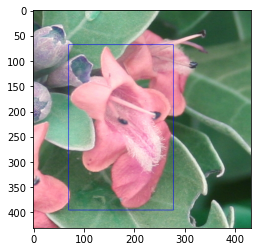

In [15]:
x, y, w, h = map(float, label[0].split(" ")[1:])
    
l = int((x - w / 2) * dw)
r = int((x + w / 2) * dw)
t = int((y - h / 2) * dh)
b = int((y + h / 2) * dh)
    
if l < 0:
    l = 0
if r > dw - 1:
    r = dw - 1
if t < 0:
    t = 0
if b > dh - 1:
    b = dh - 1
        
cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    
plt.imshow(img)
plt.show()